In [1]:
from sklearn import datasets

In [2]:
dataset = datasets.load_diabetes(as_frame=True)
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
# An overview of all information provided

dataset.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
from matplotlib import pyplot as plt

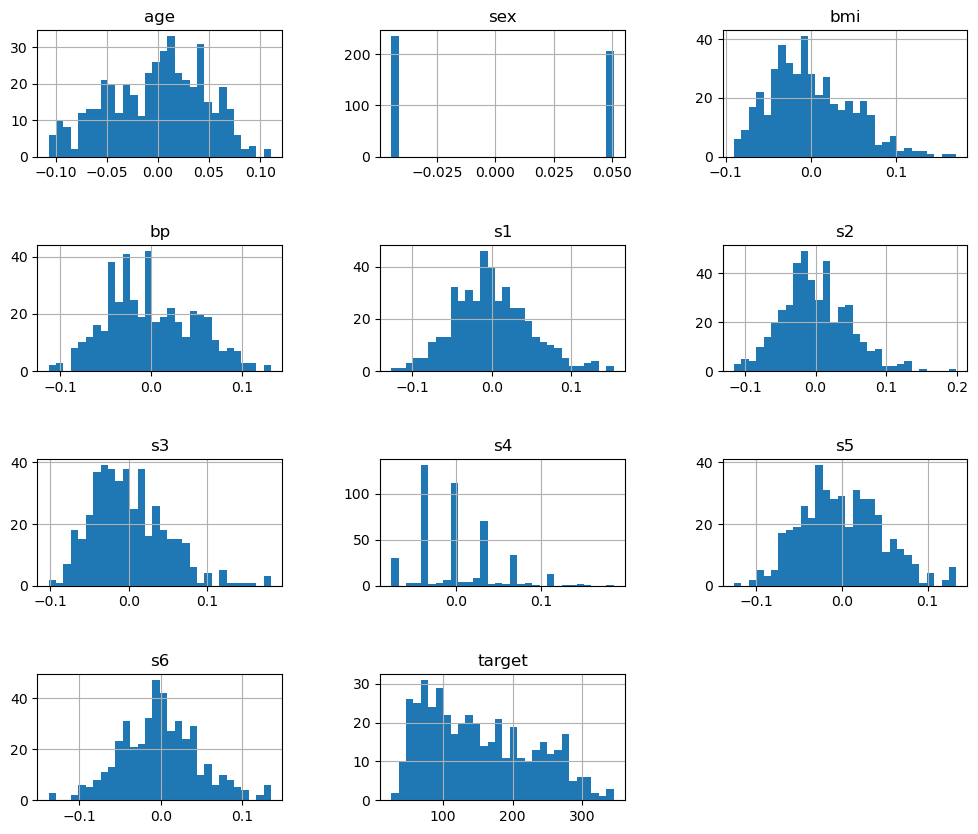

In [5]:
dataset.frame.hist(figsize=(12,10), bins = 30)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
#let's only include a fraction of the data, to make analysis easier
rng = np.random.RandomState(0)
indicies = rng.choice(
    np.arange(dataset.frame.shape[0]),
    size= 100,
    replace=False
)

In [8]:
drop_columns = ['sex']

In [9]:
subset = dataset.frame.drop(columns=drop_columns).iloc[indicies]

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


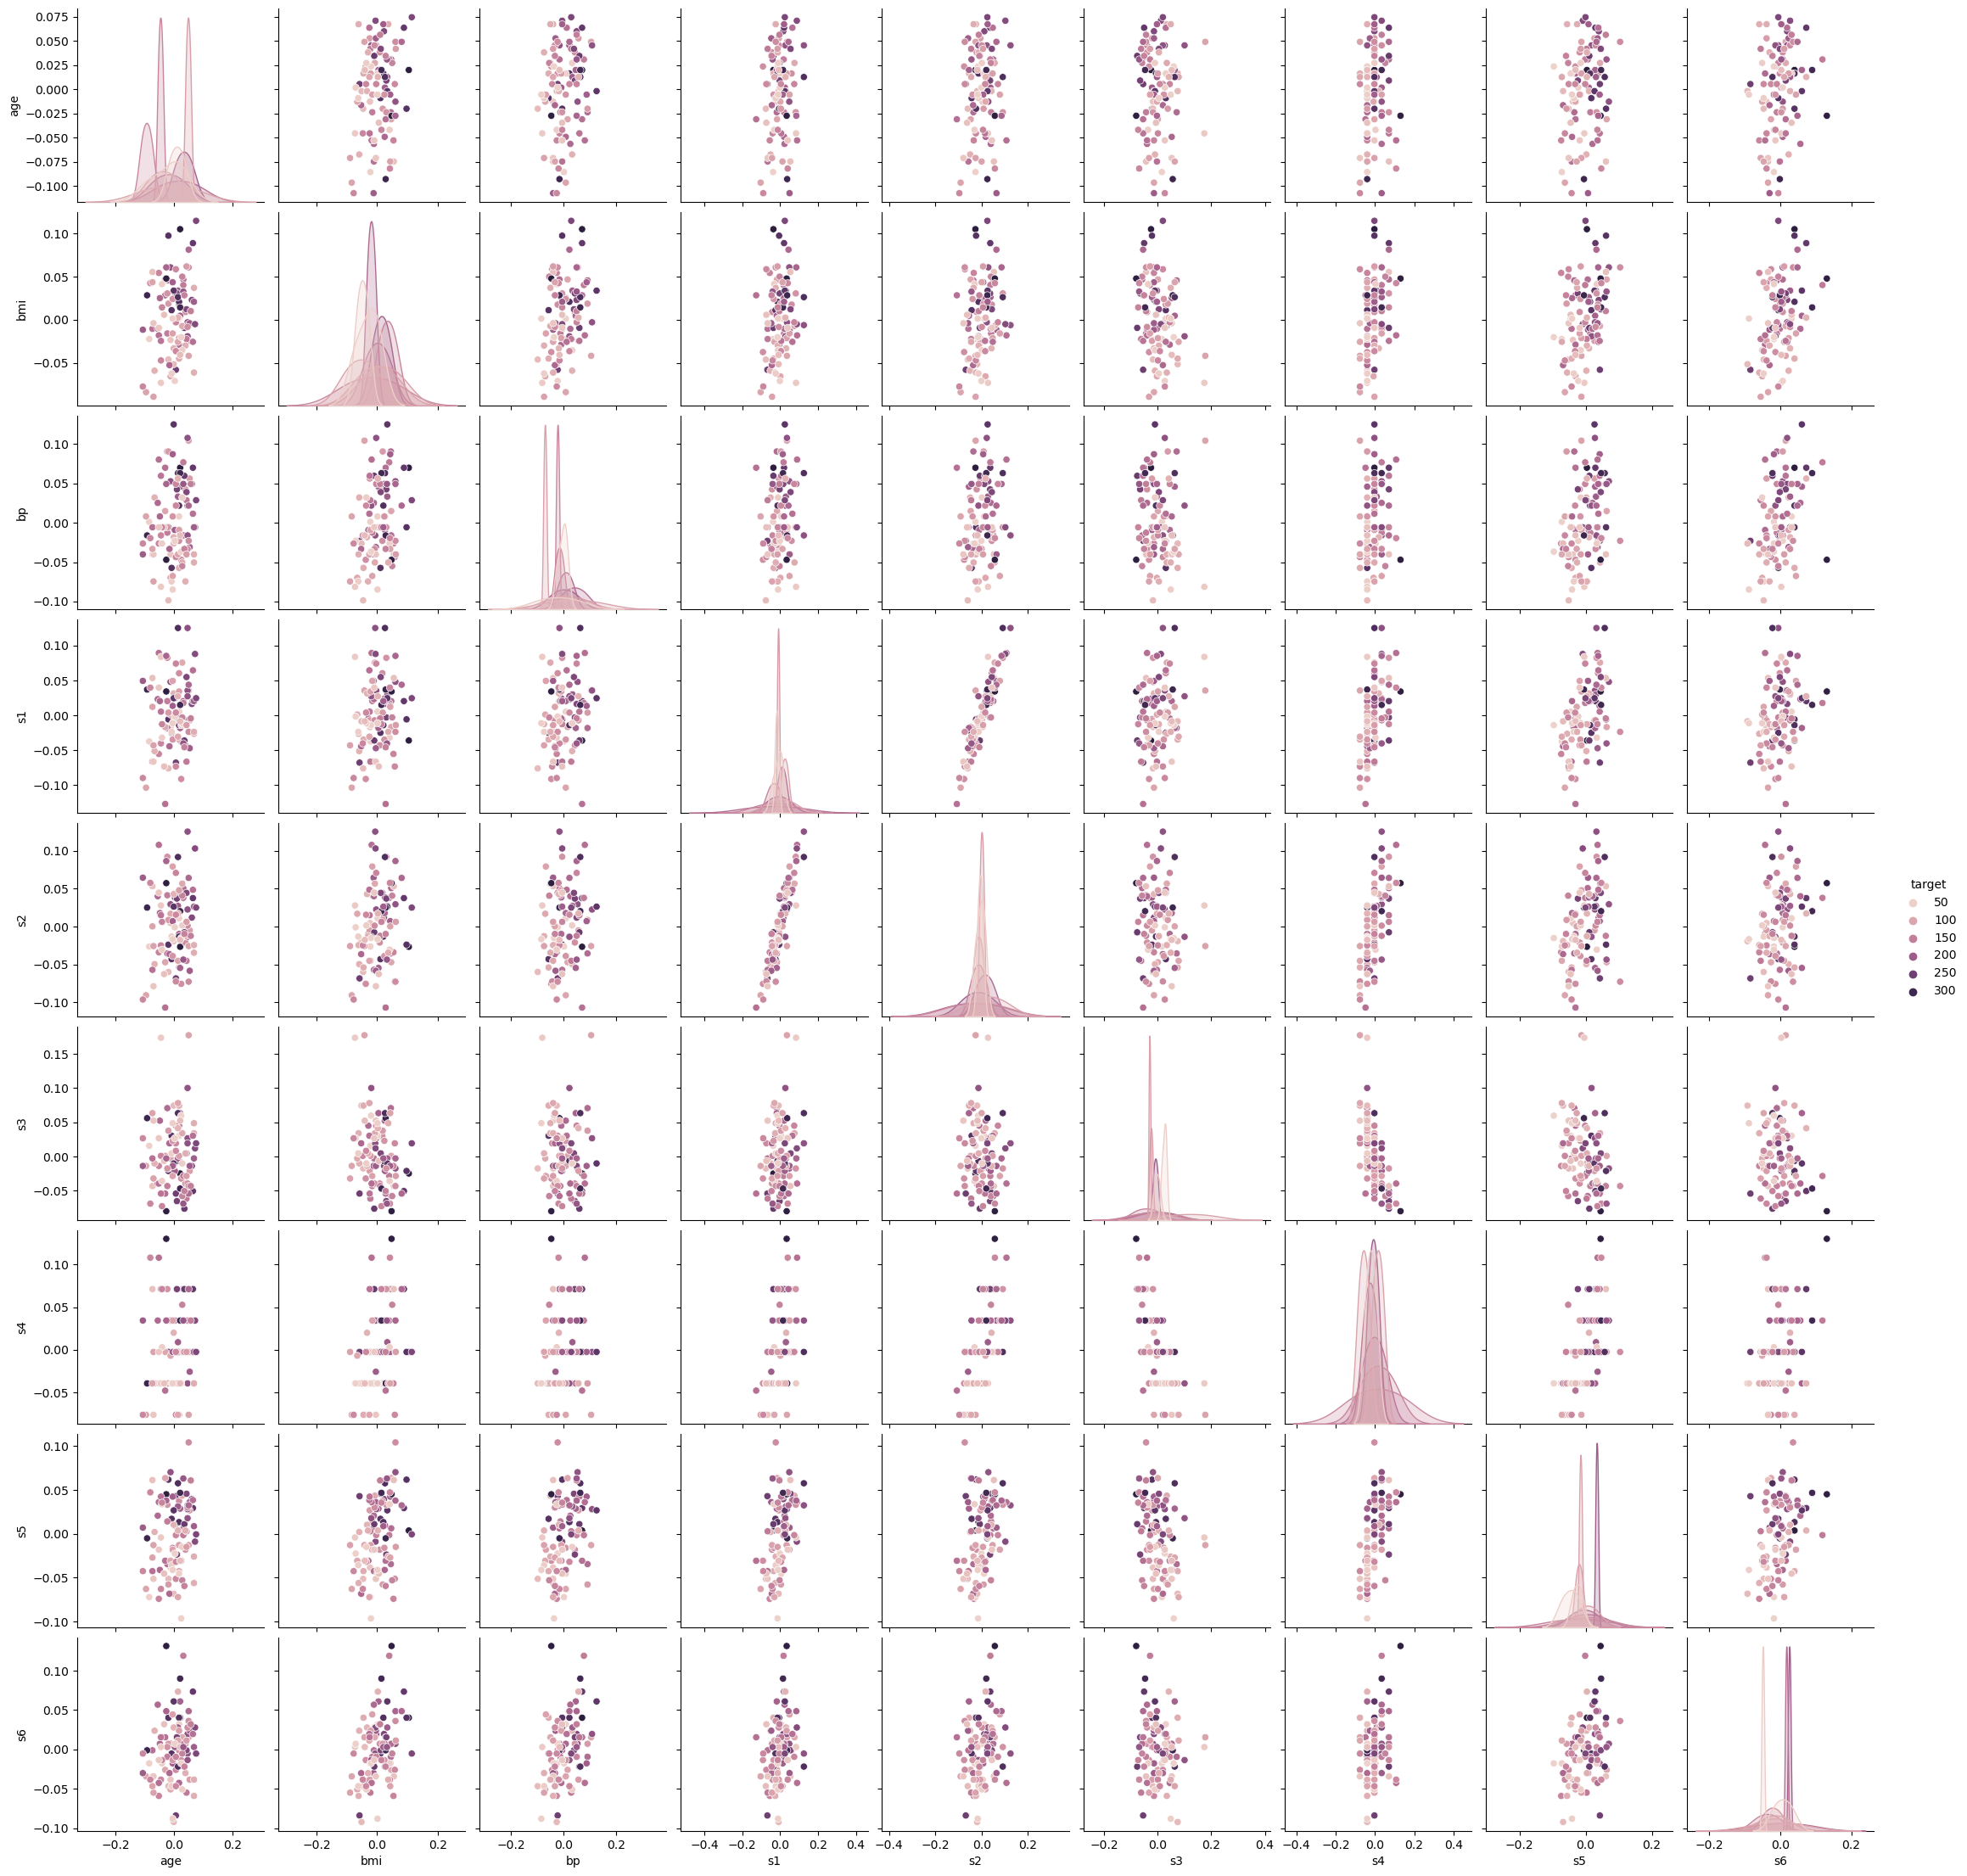

In [10]:
sns.pairplot(subset, hue='target')

In [29]:
X = dataset.data
y = dataset.frame['target']

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, shuffle=True)

# Random Forest

In [31]:
# let's create out RF model
params = {
    'n_estimators':300,
    'random_state':48
}
rf = RandomForestRegressor(**params)

In [32]:
# train the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=48)

In [34]:
R2 = rf.score(X_test, y_test)
print(f"Coefficient of determination:\n    {R2:.3f}")

Coefficient of determination:
    0.514


In [35]:
#let's find what the most important features are when determining diabetes progression

pi_params = {
    'X': X_test,
    'y': y_test,
    'n_repeats':10,
    'n_jobs':2,
    'random_state':48,
}

feature_names = [f"feature {i}" for i in range(X.shape[1])]
results = permutation_importance(rf, **pi_params)

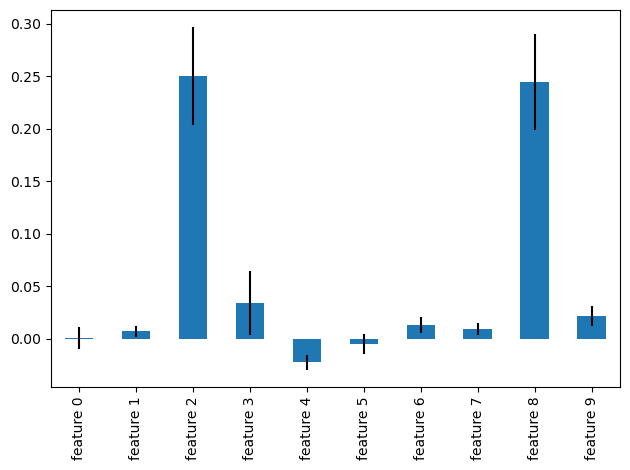

In [36]:
forest_importances = pd.Series(results.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=results.importances_std, ax=ax)
fig.tight_layout()
plt.show()

# Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

In [38]:
gb_params = {
    'loss':'squared_error',
    # 'learning_rate': 0.01,
    'n_estimators': 300,
    'random_state':48,
}
gb = GradientBoostingRegressor(**gb_params)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.4736418320917358

In [39]:
gb.score(X_train, y_train)

0.9618124022860163

In [40]:
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Gradient Boost MSE score:\n     {mse}')
print(f'Gradient Boost MAE score:\n     {mae}')
print(f'Gradient Boost RMSE score:\n     {rmse}')

Gradient Boost MSE score:
     3304.215159994949
Gradient Boost MAE score:
     46.813369038336596
Gradient Boost RMSE score:
     57.48230301575389


In [41]:
results_gb = permutation_importance(gb, **pi_params)

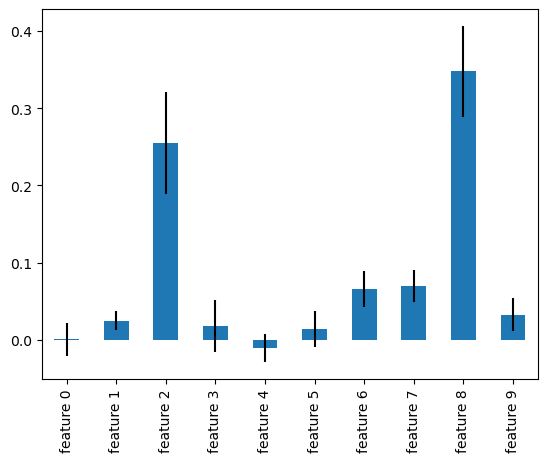

In [42]:
gb_importances = pd.Series(results_gb.importances_mean, index = feature_names)

fig,ax=plt.subplots()
gb_importances.plot.bar(yerr=results_gb.importances_std, ax=ax)
plt.show()

# BELOW IS EXPERIMENTING WITH DIFFERENT HYPERPARAMETER VALUES TO IMPROVE THE MODEL PERFORMANCE.

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
opt_params = {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 48, 'verbose': 0, 'warm_start': False}
rf = RandomForestRegressor(**opt_params)
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.5403719694696039

In [45]:
rf.score(X_train, y_train)

0.5507769383452775

In [46]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Random Forest MSE score:\n     {mse}')
print(f'Random Forest MAE score:\n     {mae}')
print(f'Random Forest RMSE score:\n     {rmse}')

Random Forest MSE score:
     2885.3164993572263
Random Forest MAE score:
     43.412753869251304
Random Forest RMSE score:
     53.715142179437876
